In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import requests

#Download a csv file containing the cases of covid-19
url = "https://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv"

In [ ]:
from io import BytesIO

type(requests.get(url).content)

bytes

In [ ]:
csv_file=BytesIO(requests.get(url).content)
type(csv_file)

_io.BytesIO

In [ ]:
covid_df=pd.read_csv(csv_file)
covid_df.head(10)

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed
5,6,26/01/2020,21/01/2020,M,47,NaN,Discharged,HK resident,Imported case,Confirmed
6,7,26/01/2020,21/01/2020,F,68,NaN,Discharged,HK resident,Imported case,Confirmed
7,8,26/01/2020,25/01/2020,M,64,NaN,Discharged,Non-HK resident,Imported case,Confirmed
8,9,29/01/2020,25/01/2020,F,73,NaN,Discharged,Non-HK resident,Imported case,Confirmed
9,10,29/01/2020,25/01/2020,M,72,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15441 entries, 0 to 15440
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Case no.                          15441 non-null  int64  
 1   Report date                       15441 non-null  object 
 2   Date of onset                     15421 non-null  object 
 3   Gender                            15435 non-null  object 
 4   Age                               15435 non-null  object 
 5   Name of hospital admitted         0 non-null      float64
 6   Hospitalised/Discharged/Deceased  15435 non-null  object 
 7   HK/Non-HK resident                15435 non-null  object 
 8   Classification*                   15435 non-null  object 
 9   Case status*                      15441 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
covid_df['Gender'].value_counts()

F          8010
M          7417
Pending       8
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

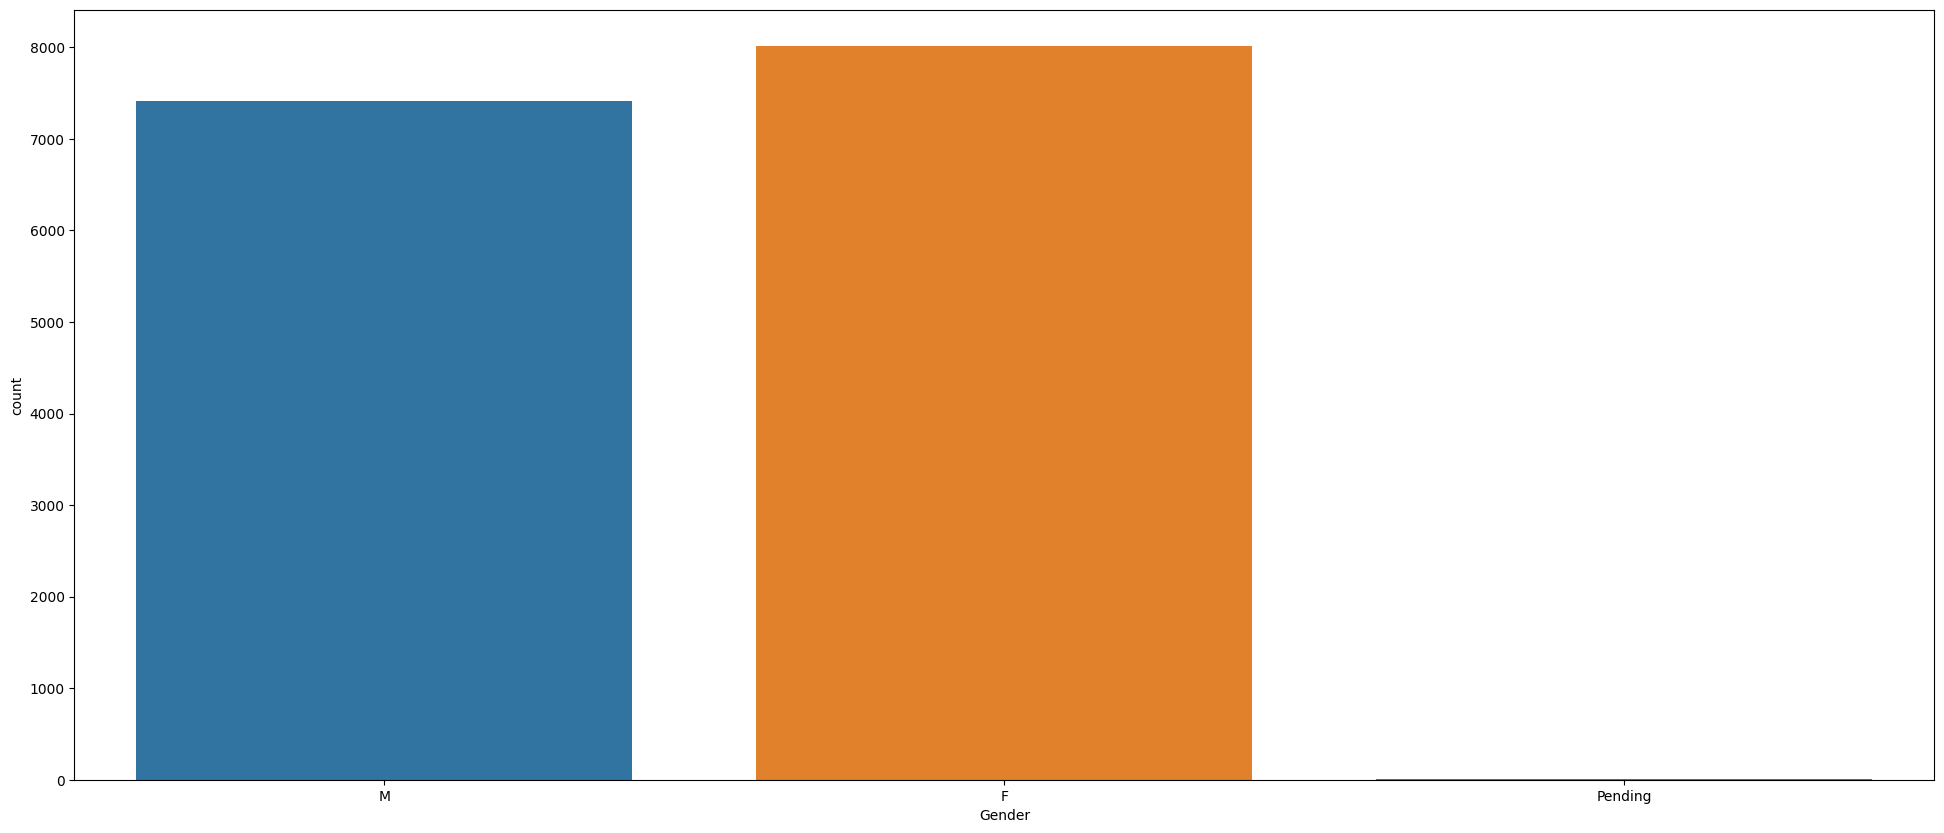

In [ ]:
plt.figure(figsize=(24,10))
sns.countplot(x='Gender',data=covid_df)

In [ ]:
covid_df[covid_df['Gender']=='Pending']

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*
14369,14370,02/02/2022,Pending,Pending,41,NaN,Hospitalised,Non-HK resident,Locally acquired case,Pending
14372,14373,02/02/2022,Pending,Pending,56,NaN,Hospitalised,Non-HK resident,Locally acquired case,Pending
15190,15191,06/02/2022,01/02/2022,Pending,46,NaN,Pending admission,HK resident,Locally acquired case,Confirmed
15307,15308,06/02/2022,Pending,Pending,Pending,NaN,Pending admission,Pending,Locally acquired case,Pending
15422,97079,01/02/2022,Pending,Pending,Pending,NaN,Pending admission,Pending,Locally acquired case,Pending
15434,97091,06/02/2022,Pending,Pending,Pending,NaN,Pending admission,Pending,Locally acquired case,Pending
15436,97093,06/02/2022,Pending,Pending,Pending,NaN,Pending admission,Pending,Locally acquired case,Pending
15437,97094,06/02/2022,Pending,Pending,Pending,NaN,Pending admission,Pending,Locally acquired case,Pending


In [ ]:
covid_df[covid_df['Gender'].isna()]

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*
11251,11252,13/03/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted
11264,11265,14/03/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted
11351,11352,19/03/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted
11702,11703,20/04/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted
11725,11726,23/04/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted
13143,13144,22/01/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted


In [ ]:
covid_df_cleaned_gender= covid_df[covid_df['Gender']!='Pending']
covid_df_cleaned_gender.dropna(subset=['Gender'],inplace=True)
covid_df_cleaned_gender

<ipython-input-38-aac4f8764094>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_cleaned_gender.dropna(subset=['Gender'],inplace=True)


,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed
...,...,...,...,...,...,...,...,...,...,...
15433,97090,06/02/2022,Pending,F,48,NaN,Pending admission,Pending,Locally acquired case,Pending
15435,97092,06/02/2022,Asymptomatic,F,37,NaN,Pending admission,Pending,Locally acquired case,Asymptomatic
15438,97095,06/02/2022,05/02/2022,M,32,NaN,Pending admission,Non-HK resident,Locally acquired case,Confirmed
15439,97096,06/02/2022,Pending,F,72,NaN,Deceased,Pending,Locally acquired case,Pending


<Axes: xlabel='Gender', ylabel='count'>

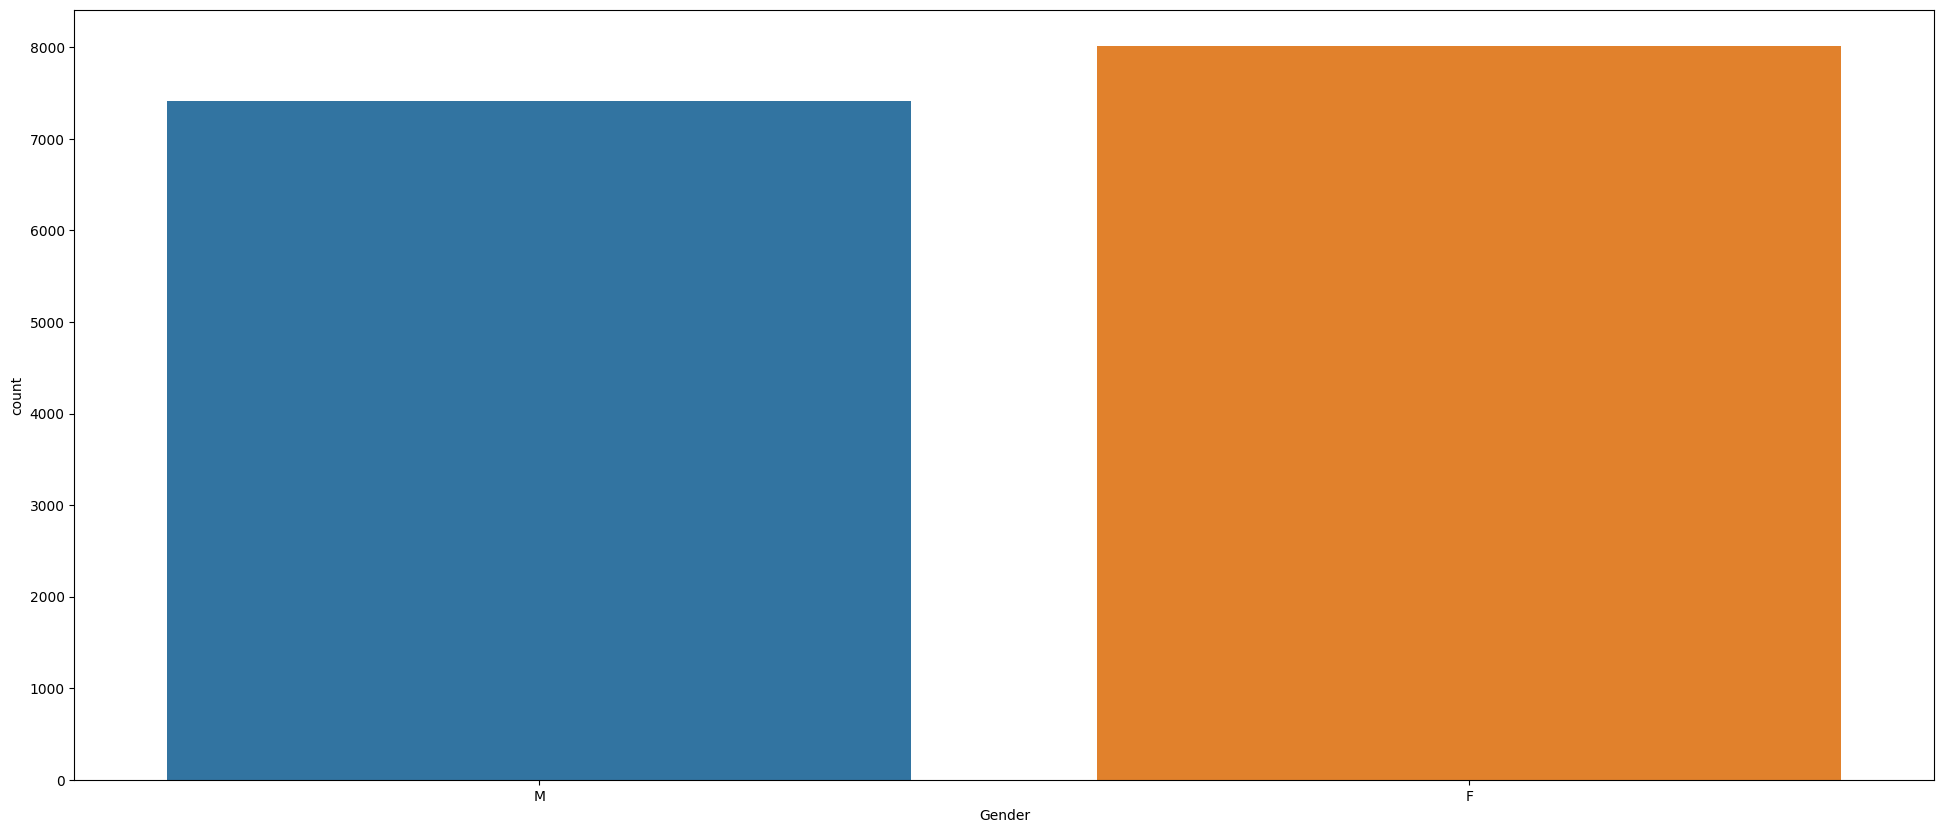

In [ ]:
plt.figure(figsize=(24,10))
sns.countplot(x='Gender',data=covid_df_cleaned_gender)

In [ ]:
covid_df_cleaned_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15427 entries, 0 to 15440
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Case no.                          15427 non-null  int64  
 1   Report date                       15427 non-null  object 
 2   Date of onset                     15413 non-null  object 
 3   Gender                            15427 non-null  object 
 4   Age                               15427 non-null  object 
 5   Name of hospital admitted         0 non-null      float64
 6   Hospitalised/Discharged/Deceased  15427 non-null  object 
 7   HK/Non-HK resident                15427 non-null  object 
 8   Classification*                   15427 non-null  object 
 9   Case status*                      15427 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


<Axes: xlabel='Age', ylabel='count'>

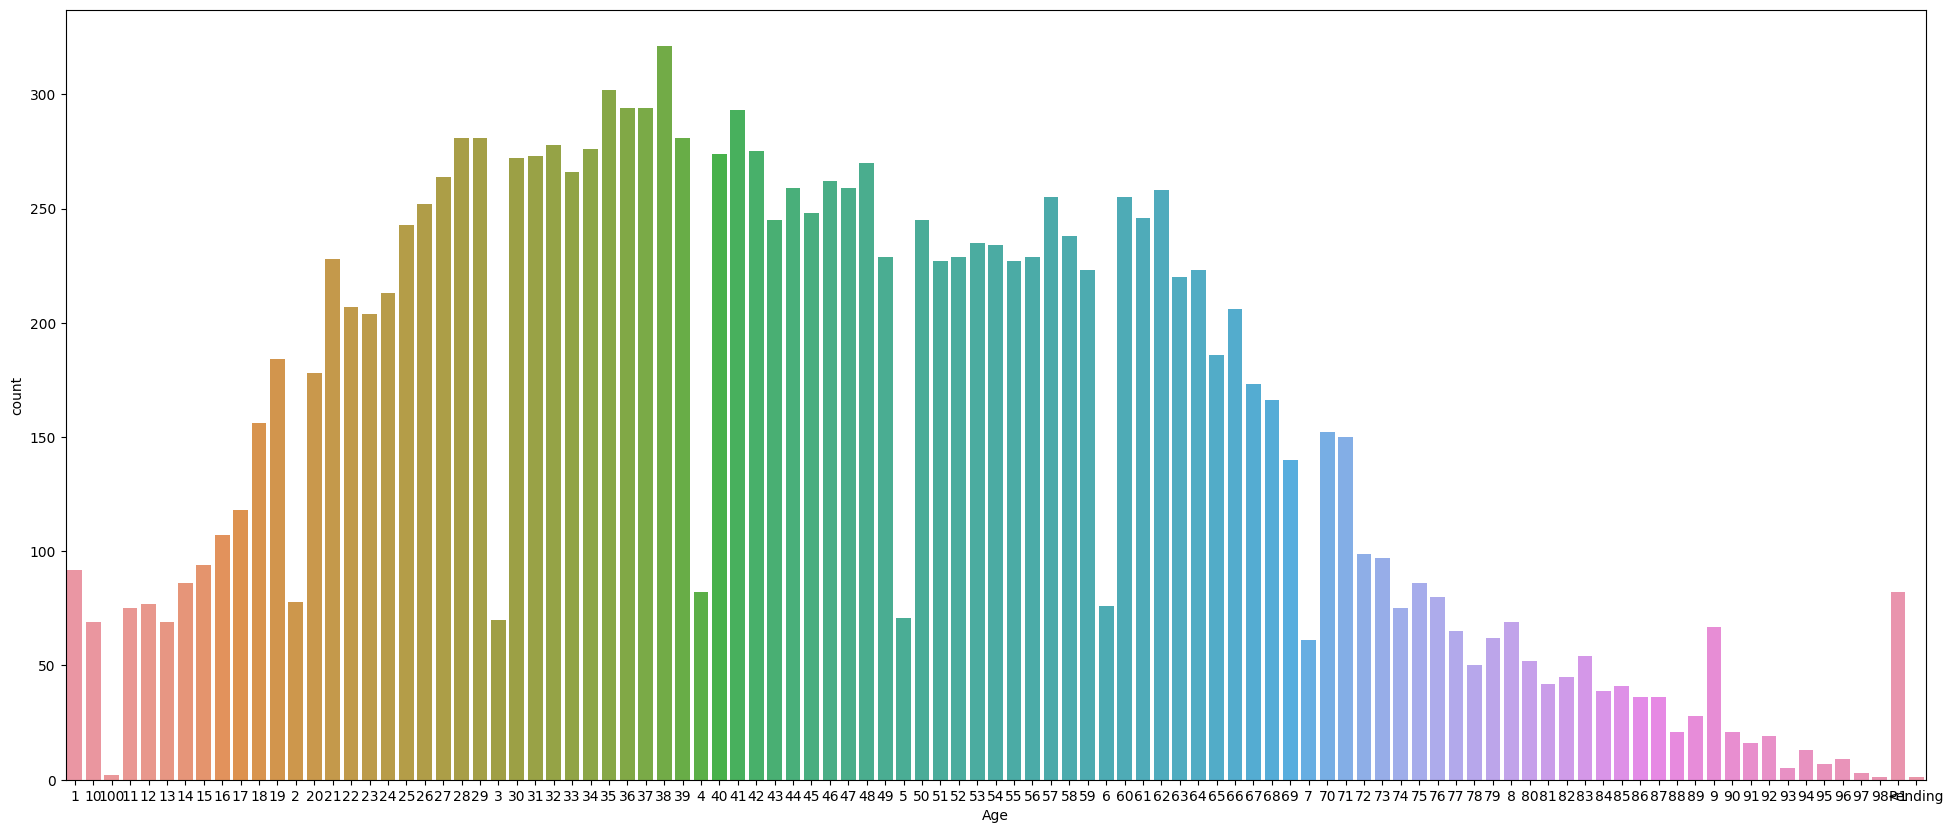

In [ ]:
plt.figure(figsize=(24,10))
sns.countplot(x='Age',data=covid_df_cleaned_gender.sort_values('Age'))

In [ ]:
covid_df_cleaned_gender[covid_df_cleaned_gender['Age'].str.isnumeric() !=True]

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*
756,757,01/04/2020,30/03/2020,M,<1,NaN,Discharged,HK resident,Epidemiologically linked with local case,Confirmed
952,953,08/04/2020,Asymptomatic,M,<1,NaN,Discharged,HK resident,Imported case,Confirmed
1329,1330,09/07/2020,Asymptomatic,M,<1,NaN,Discharged,HK resident,Imported case,Confirmed
1501,1502,13/07/2020,Asymptomatic,M,<1,NaN,Discharged,HK resident,Imported case,Confirmed
2107,2108,22/07/2020,19/07/2020,F,<1,NaN,Discharged,HK resident,Epidemiologically linked with local case,Confirmed
...,...,...,...,...,...,...,...,...,...,...
14891,14892,05/02/2022,03/02/2022,M,<1,NaN,Hospitalised,HK resident,Locally acquired case,Confirmed
15053,15054,05/02/2022,02/02/2022,M,<1,NaN,Hospitalised,HK resident,Locally acquired case,Confirmed
15108,15109,06/02/2022,04/02/2022,F,<1,NaN,Hospitalised,HK resident,Locally acquired case,Confirmed
15109,15110,06/02/2022,02/02/2022,F,Pending,NaN,Hospitalised,Non-HK resident,Locally acquired case,Confirmed


In [ ]:
covid_df_cleaned_gender_age = covid_df_cleaned_gender.copy()
covid_df_cleaned_gender_age.loc[covid_df_cleaned_gender_age.Age == '<1', 'Age'] = 0

covid_df_cleaned_gender_age[covid_df_cleaned_gender_age['Age'].str.isnumeric() == False]

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*
15109,15110,06/02/2022,02/02/2022,F,Pending,NaN,Hospitalised,Non-HK resident,Locally acquired case,Confirmed


In [ ]:
covid_df_cleaned_gender_age = covid_df_cleaned_gender_age[covid_df_cleaned_gender_age['Age'] != 'Pending']
covid_df_cleaned_gender_age[covid_df_cleaned_gender_age['Age'].str.isnumeric() == False]

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*


In [ ]:
covid_df_cleaned_gender_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15426 entries, 0 to 15440
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Case no.                          15426 non-null  int64  
 1   Report date                       15426 non-null  object 
 2   Date of onset                     15412 non-null  object 
 3   Gender                            15426 non-null  object 
 4   Age                               15426 non-null  object 
 5   Name of hospital admitted         0 non-null      float64
 6   Hospitalised/Discharged/Deceased  15426 non-null  object 
 7   HK/Non-HK resident                15426 non-null  object 
 8   Classification*                   15426 non-null  object 
 9   Case status*                      15426 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
covid_df_cleaned_gender_age['Age'] = covid_df_cleaned_gender_age['Age'].astype(int)
covid_df_cleaned_gender_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15426 entries, 0 to 15440
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Case no.                          15426 non-null  int64  
 1   Report date                       15426 non-null  object 
 2   Date of onset                     15412 non-null  object 
 3   Gender                            15426 non-null  object 
 4   Age                               15426 non-null  int64  
 5   Name of hospital admitted         0 non-null      float64
 6   Hospitalised/Discharged/Deceased  15426 non-null  object 
 7   HK/Non-HK resident                15426 non-null  object 
 8   Classification*                   15426 non-null  object 
 9   Case status*                      15426 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.3+ MB


<Axes: xlabel='Age', ylabel='count'>

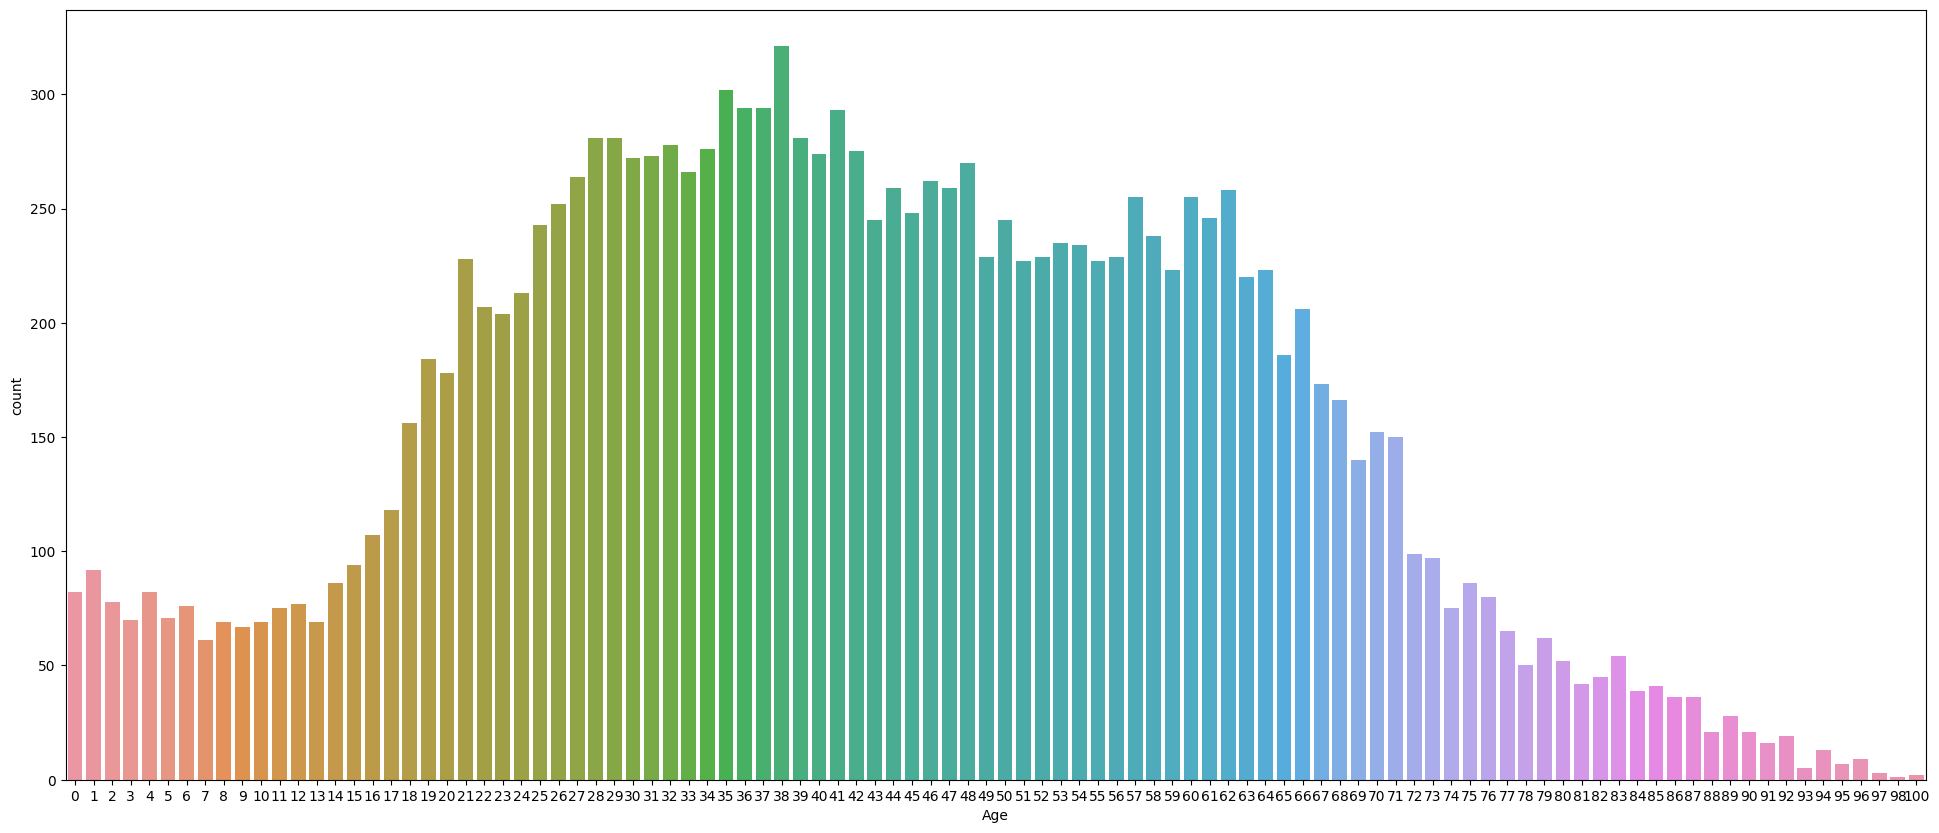

In [ ]:
plt.figure(figsize=(24,10))
sns.countplot(x='Age',data=covid_df_cleaned_gender_age.sort_values('Age'))

<Axes: xlabel='Report date', ylabel='Age'>

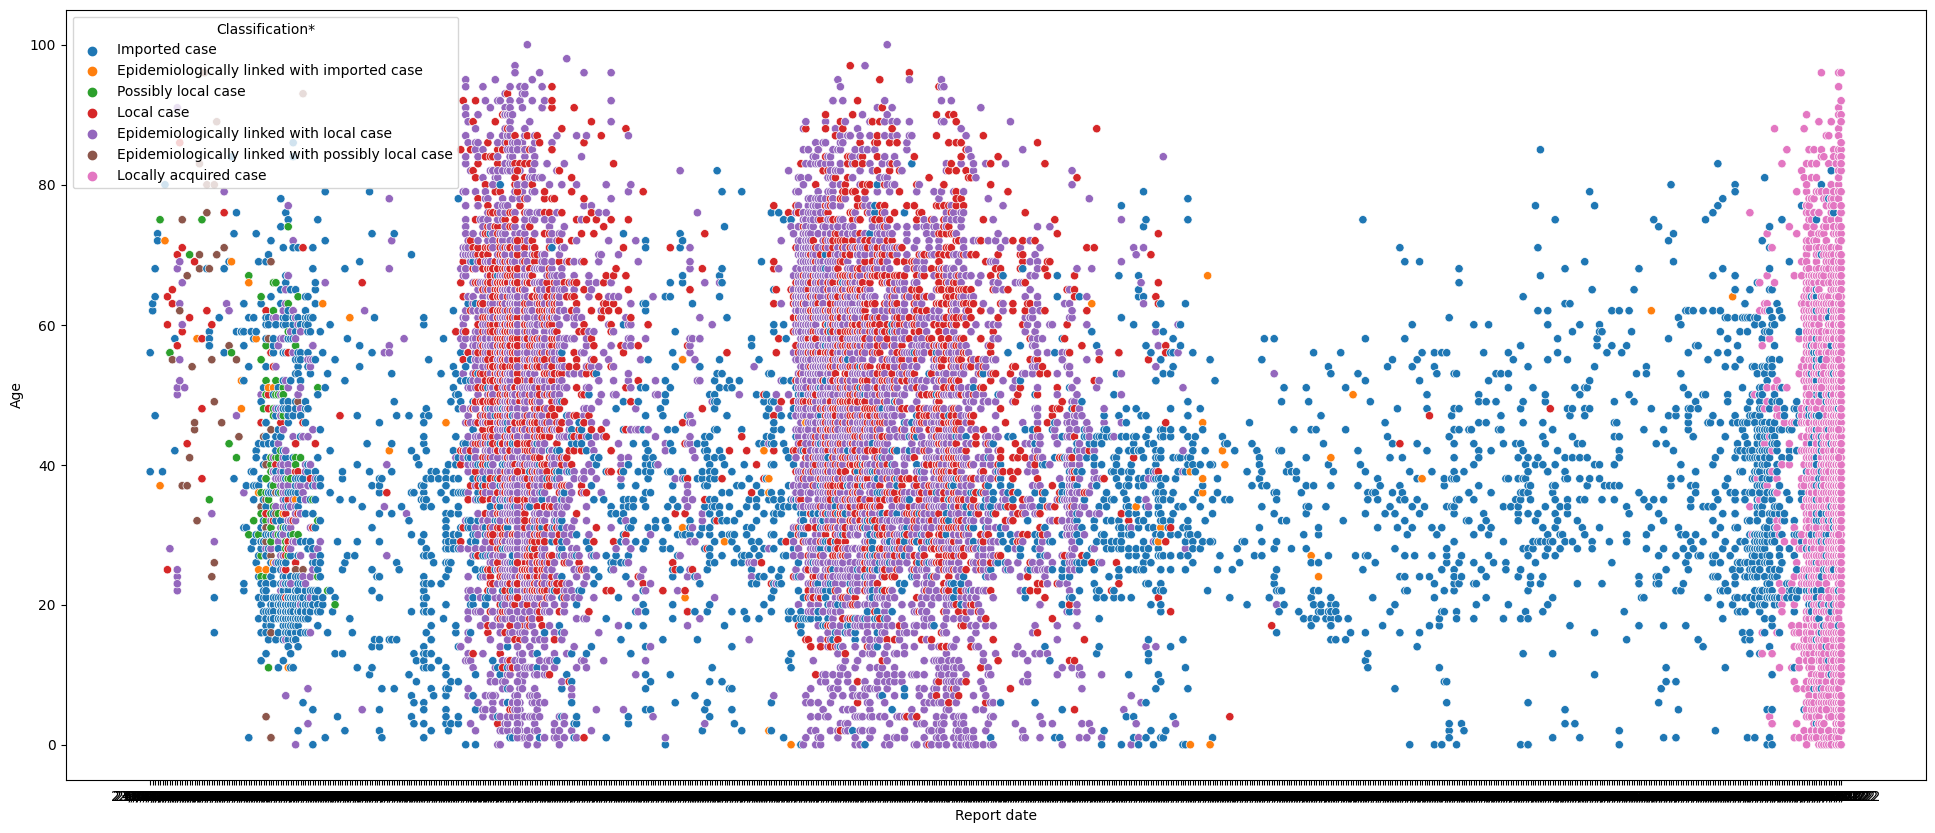

In [ ]:
plt.figure(figsize=(24,10))

sns.scatterplot(x='Report date',y='Age',hue='Classification*',data=covid_df_cleaned_gender_age)
